### Install Packages and Import Dataset

In this notebook, we’ll be working with a data set of 932 real estate transactions in Sacramento, California. As a reminder, this dataset contains several features regarding property details, including location, size, type, and price..

Each row in the dataset represents a listing, with various property details:

- **City:** The city where the property is located.
- **Zip:** The postal code for the property’s location.
- **Beds:** The number of bedrooms in the property.
- **Baths:** The number of bathrooms in the property.
- **Sqft:** The square footage of the property.
- **Type:** The type of property (e.g., Residential).
- **Latitude:** The latitude coordinate of the property.
- **Longitude:** The longitude coordinate of the property.

The target column is **Price**, which we will try to predict based on the other features in the dataset.

This dataset was obtained from (https://support.spatialkey.com/spatialkey-sample-csv-data/)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import set_config


 While it's easy to understand, KNN regression struggles to make predictions outside the range of the training data and gets slower with larger datasets. 
 
 An alternative is **linear regression**, which solves both of these issues. Linear regression is widely used because it provides a clear equation that explains the relationship between predictors and the outcome. This notebook will start with simple linear regression, which uses one predictor and one outcome, and later moves to multivariable linear regression. 
 
 Linear regression fits a straight line through the data to make predictions.

#### Our question is predictive: 
Can we use the size of a house in the Sacramento, CA area to predict its sale price? 

The equation for the straight line is:

$$
\text{House sale price} = b_0 + b_1 \times (\text{house size})
$$

where:

- $ b_0 $ is the price when the house size is 0 (the intercept).
- $ b_1 $ is how much the price increases for each unit increase in house size (the slope).

Using data to find the line of best fit means finding the coefficients $ b_0 $ and $ b_1 $, which define the line. You can think of $ b_0 $ as the base price and $ b_1 $ as the price increase per square foot. 

In [3]:
# Output dataframes instead of arrays
set_config(transform_output="pandas")

#set seed for reproducibility
np.random.seed(10)

sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


This question guides our initial exploration: the columns in the data that we are interested in are 
- sq__ft (house size, in livable square feet)
-  price (house sale price, in US dollars (USD)). 

### Linear regression

We can perform simple linear regression in Python using scikit-learn much like we did for KNN regression. Instead of using a `KNeighborsRegressor` model, we create a `LinearRegression` model. Unlike KNN, we don't need to pick a $K$ value or use cross-validation to fine-tune the model.

Here's how we can predict house sale prices based on house size using simple linear regression with the full Sacramento real estate dataset.

### Training, evaluating, and tuning the model

Step 1. Split the dataset into test and train

In [4]:
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size=0.75
)

Step 2. fit the linear regression model.
Here, we extract the slope of the line via the `coef_[0]` property, as well as the intercept of the line via the `intercept_` property.

In [6]:
# fit the linear regression model
lm = LinearRegression()
lm.fit(
   sacramento_train[["sq__ft"]],  # A single-column data frame
   sacramento_train["price"]  # A series
)

# make a dataframe containing slope and intercept coefficients
pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]})

,slope,intercept
0,135.405151,17062.984189


Our coefficients are:

- Intercept ($b_0$): 17,063
- Slope ($b_1$): 133

This means the equation of the line of best fit is:

$$
\text{House sale price} = 17,063 + 133 \times (\text{house size})
$$

So for each additional square foot of house size, the price increases by 133 units.

Step 3. Finally, we predict on the test data set to assess how well our model does.

In [7]:
# make predictions
sacramento_test["predicted"] = lm.predict(sacramento_test[["sq__ft"]])

# calculate RMSPE
RMSPE = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

RMSPE

89035.12367992694

Our final model's test error, measured by RMSPE, is $89,035. Since this is in US Dollars, it tells us how far off our predictions are on average. But does that make the model "good" at predicting house prices based on home size? That depends on how precise you need the predictions to be for your purpose!

To visualize the simple linear regression model, we can plot the predicted house sale prices across all possible house sizes. Since the model is a straight line, we only need to calculate the predicted prices at the smallest and largest house sizes, then draw a line between them. By overlaying this line on a scatter plot of the actual housing prices, we can visually check how well the model fits the data.

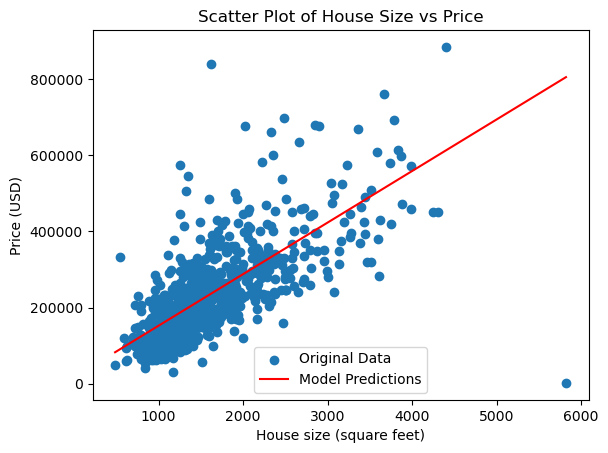

In [10]:
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

Don't worry about the details of this plot. This is simply depicting the predicted values of house price (red line) for the final linear regression model.



### Multivariable linear regression

We can use multivariable linear regression to include multiple predictors. Here, we'll apply multivariable linear regression to the Sacramento real estate data, using both house size (square feet) and number of bedrooms as predictors for the house sale price. 

Using scikit-learn, we can easily include both predictors and fit the model as before.

Step 1. fit the linear regression model on the training data.

In [11]:
mlm = LinearRegression()
mlm.fit(
    sacramento_train[["sq__ft", "beds"]],
    sacramento_train["price"]
)

LinearRegression()

Step 2. Make predictions on the test data set to assess the quality of our model.

In [12]:
sacramento_test["predicted"] = mlm.predict(sacramento_test[["sq__ft","beds"]])

lm_mult_test_RMSPE = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)
lm_mult_test_RMSPE

91727.91046923249

Our model’s test error as assessed by RMSPE is $91,727. 

For each predictor in a multivariable linear regression model, we get a slope (coefficient) and an intercept, which together describe the best fit mathematically. In scikit-learn, we can extract these values from the model as follows:

Slopes (coefficients): These are obtained from the `coef_` property of the model.
Intercept: This is obtained from the `intercept_` property of the model.

In [13]:
mlm.coef_

array([   155.43727531, -21184.24787049])

In [14]:
mlm.intercept_

53995.22179883951

So since we used sacramento_train[["sq__ft", "beds"]] when training, we have that `mlm.coef_[0]` corresponds to square feet, and `mlm.coef_[1]` corresponds to beds. 

Given the model output values:

- Intercept ($b_0$): 53,995
- Slope for house size ($ b_1$): 155
- Slope for number of bedrooms ($b_2$): -21,184

The equation of the plane of best fit is:

$$
\text{House sale price} = 53,995 + 155 \times (\text{house size}) -21,184 \times (\text{number of bedrooms})
$$

This equation describes how the house sale price is predicted based on both house size and the number of bedrooms.

### Conclusion

In this notebook, we worked through several steps to predict housing prices using square feet using a data set of 932 real estate transactions in Sacramento, California. Here's a summary of what we covered:

1. **Simple Linear Regression:** We implemented simple linear regression and evaluated its performance on a test dataset.

2. **Multiple Linear Regression:** We implemented multiple linear regression and evaluated its performance on a test dataset.


We hope this notebook has provided a practical understanding of data regression, model evaluation, and the application of machine learning algorithms like linear regression. Feel free to experiment further with the dataset or the code to enhance your learning!